# Project 2: Multi-Agent Search

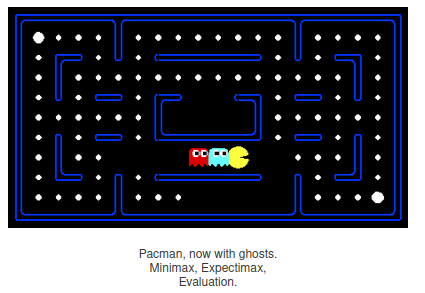

# <font color=blue>*Introduction*

In this project, you will design agents for the classic version of Pacman, including ghosts. Along the way, you will implement both minimax and expectimax search and try your hand at evaluation function design.

The code base has not changed much from the previous project, but please start with a fresh installation, rather than intermingling files from project 1.

As in project 1, this project includes an autograder for you to grade your answers on your machine. This can be run on all questions with the command:


It can be run for one particular question, such as q2, by:


It can be run for one particular test by commands of the form:


By default, the autograder displays graphics with the `-t` option, but doesn't with the `-q` option. You can force graphics by using the `--graphics` flag, or force no graphics by using the `--no-graphics` flag.

The code for this project contains the following files, available as a <a href="https://inst.eecs.berkeley.edu/~cs188/fa18/assets/files/multiagent.zip">zip archive</a>.
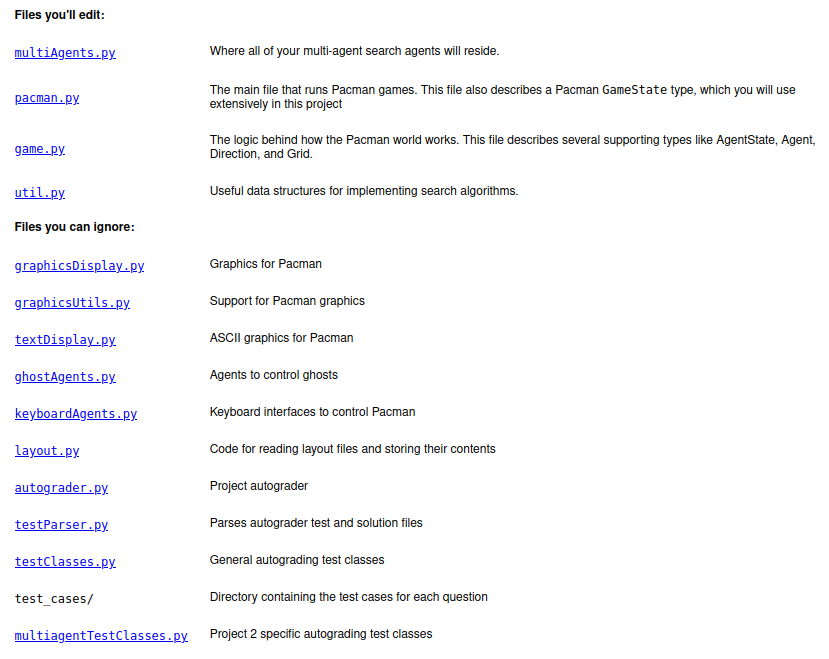



# <font color=blue>*Multi-Agent Pacman*

First, play a game of classic Pacman:


Now, run the provided `ReflexAgent` in `multiAgents.py`:


Note that it plays quite poorly even on simple layouts:


Inspect its code (in `multiAgents.py`) and make sure you understand what it's doing.

# <font color=blue>*Reflex Agent*

Improve the `ReflexAgent` in `multiAgents.py` to play respectably. The provided reflex agent code provides some helpful examples of methods that query the `GameState` for information. A capable reflex agent will have to consider both food locations and ghost locations to perform well. Your agent should easily and reliably clear the `testClassic` layout:


Try out your reflex agent on the default `mediumClassic` layout with one ghost or two (and animation off to speed up the display):
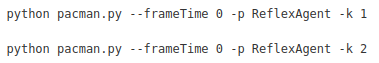

How does your agent fare? It will likely often die with 2 ghosts on the default board, unless your evaluation function is quite good.

**Note**: As features, try the reciprocal of important values (such as distance to food) rather than just the values themselves.

**Note**: The evaluation function you're writing is evaluating state-action pairs; in later parts of the project, you'll be evaluating states.

**Options**: Default ghosts are random; you can also play for fun with slightly smarter directional ghosts using `-g DirectionalGhost`. If the randomness is preventing you from telling whether your agent is improving, you can use `-f` to run with a fixed random seed (same random choices every game). You can also play multiple games in a row with `-n`. Turn off graphics with `-q` to run lots of games quickly.

**Grading**: we will run your agent on the `openClassic` layout 10 times. You will receive 0 points if your agent times out, or never wins. You will receive 1 point if your agent wins at least 5 times, or 2 points if your agent wins all 10 games. You will receive an addition 1 point if your agent's average score is greater than 500, or 2 points if it is greater than 1000. You can try your agent out under these conditions with


To run it without graphics, use:


Don't spend too much time on this question, though, as the meat of the project lies ahead.

# <font color=blue>*Minimax*

Now you will write an adversarial search agent in the provided `MinimaxAgent` class stub in `multiAgents.py`. Your minimax agent should work with any number of ghosts, so you'll have to write an algorithm that is slightly more general than what you've previously seen in lecture. In particular, your minimax tree will have multiple min layers (one for each ghost) for every max layer.

Your code should also expand the game tree to an arbitrary depth. Score the leaves of your minimax tree with the supplied `self.evaluationFunction`, which defaults to `scoreEvaluationFunction`. `MinimaxAgent` extends `MultiAgentSearchAgent`, which gives access to `self.depth` and `self.evaluationFunction`. Make sure your minimax code makes reference to these two variables where appropriate as these variables are populated in response to command line options.

**Important**: A single search ply is considered to be one Pacman move and all the ghosts' responses, so depth 2 search will involve Pacman and each ghost moving two times.

**Grading**: We will be checking your code to determine whether it explores the correct number of game states. This is the only reliable way to detect some very subtle bugs in implementations of minimax. As a result, the autograder will be very picky about how many times you call `GameState.generateSuccessor`. If you call it any more or less than necessary, the autograder will complain. To test and debug your code, run:


This will show what your algorithm does on a number of small trees, as well as a pacman game. To run it without graphics, use:


---
### <font color=red>*Hints and Observations*
- The correct implementation of minimax will lead to Pacman losing the game in some tests. This is not a problem: as it is correct behaviour, it will pass the tests.
- The evaluation function for the Pacman test in this part is already written (`self.evaluationFunction`). You shouldn't change this function, but recognize that now we're evaluating states rather than actions, as we were for the reflex agent. Look-ahead agents evaluate future states whereas reflex agents evaluate actions from the current state.
- The minimax values of the initial state in the `minimaxClassic` layout are `9`, `8`, `7`, `-492` for depths `1`, `2`, `3` and `4` respectively. Note that your minimax agent will often win (`665/1000` games for us) despite the dire prediction of depth `4` minimax.

- Pacman is always agent 0, and the agents move in order of increasing agent index.
- All states in minimax should be `GameStates`, either passed in to `getAction` or generated via `GameState.generateSuccessor`. In this project, you will not be abstracting to simplified states.
- On larger boards such as `openClassic` and `mediumClassic` (the default), you'll find Pacman to be good at not dying, but quite bad at winning. He'll often thrash around without making progress. He might even thrash around right next to a dot without eating it because he doesn't know where he'd go after eating that dot. Don't worry if you see this behavior, question 5 will clean up all of these issues.
- When Pacman believes that his death is unavoidable, he will try to end the game as soon as possible because of the constant penalty for living. Sometimes, this is the wrong thing to do with random ghosts, but minimax agents always assume the worst:

- Make sure you understand why Pacman rushes the closest ghost in this case.


# <font color=blue>*Alpha-Beta Pruning*

Make a new agent that uses alpha-beta pruning to more efficiently explore the minimax tree, in `AlphaBetaAgent`. Again, your algorithm will be slightly more general than the pseudocode from lecture, so part of the challenge is to extend the alpha-beta pruning logic appropriately to multiple minimizer agents.

You should see a speed-up (perhaps depth 3 alpha-beta will run as fast as depth 2 minimax). Ideally, depth 3 on `smallClassic` should run in just a few seconds per move or faster.


The `AlphaBetaAgent` minimax values should be identical to the `MinimaxAgent` minimax values, although the actions it selects can vary because of different tie-breaking behavior. Again, the minimax values of the initial state in the `minimaxClassic` layout are 9, 8, 7 and -492 for depths 1, 2, 3 and 4 respectively.

**Grading**: Because we check your code to determine whether it explores the correct number of states, it is important that you perform alpha-beta pruning without reordering children. In other words, successor states should always be processed in the order returned by `GameState.getLegalActions`. Again, do not call `GameState.generateSuccessor` more than necessary.

**You must not prune on equality in order to match the set of states explored by our autograder**. (Indeed, alternatively, but incompatible with our autograder, would be to also allow for pruning on equality and invoke alpha-beta once on each child of the root node, but this will not match the autograder.)

The pseudo-code below represents the algorithm you should implement for this question.
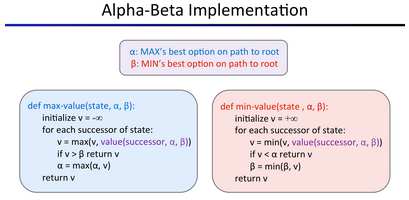

To test and debug your code, run:


This will show what your algorithm does on a number of small trees, as well as a pacman game. To run it without graphics, use:


The correct implementation of alpha-beta pruning will lead to Pacman losing some of the tests. This is not a problem: as it is correct behaviour, it will pass the tests.

# <font color=blue>*Expectimax*

Minimax and alpha-beta are great, but they both assume that you are playing against an adversary who makes optimal decisions. As anyone who has ever won tic-tac-toe can tell you, this is not always the case. In this question you will implement the `ExpectimaxAgent`, which is useful for modeling probabilistic behavior of agents who may make suboptimal choices.

As with the search and constraint satisfaction problems covered so far in this class, the beauty of these algorithms is their general applicability. To expedite your own development, we've supplied some test cases based on generic trees. You can debug your implementation on small the game trees using the command:


Debugging on these small and manageable test cases is recommended and will help you to find bugs quickly.

Once your algorithm is working on small trees, you can observe its success in Pacman. Random ghosts are of course not optimal minimax agents, and so modeling them with minimax search may not be appropriate. `ExpectimaxAgent`, will no longer take the min over all ghost actions, but the expectation according to your agent's model of how the ghosts act. To simplify your code, assume you will only be running against an adversary which chooses amongst their `getLegalActions` uniformly at random.

To see how the `ExpectimaxAgent` behaves in Pacman, run:


You should now observe a more cavalier approach in close quarters with ghosts. In particular, if Pacman perceives that he could be trapped but might escape to grab a few more pieces of food, he'll at least try. Investigate the results of these two scenarios:



You should find that your `ExpectimaxAgent` wins about half the time, while your `AlphaBetaAgent` always loses. Make sure you understand why the behavior here differs from the minimax case.

The correct implementation of expectimax will lead to Pacman losing some of the tests. This is not a problem: as it is correct behaviour, it will pass the tests.

# <font color=blue>*Evaluation Function*

Write a better evaluation function for pacman in the provided function `betterEvaluationFunction`. The evaluation function should evaluate states, rather than actions like your reflex agent evaluation function did. You may use any tools at your disposal for evaluation, including your search code from the last project. With depth 2 search, your evaluation function should clear the `smallClassic` layout with one random ghost more than half the time and still run at a reasonable rate (to get full credit, Pacman should be averaging around `1000` points when he's winning).

**Grading**: the autograder will run your agent on the `smallClassic` layout 10 times. We will assign points to your evaluation function in the following way:
- If you win at least once without timing out the autograder, you receive 1 points. Any agent not satisfying these criteria will receive 0 points.
- +1 for winning at least 5 times, +2 for winning all 10 times
- +1 for an average score of at least 500, +2 for an average score of at least 1000 (including scores on lost games)
- +1 if your games take on average less than 30 seconds on the autograder machine, when run with `--no-graphics`. The autograder is run on EC2, so this machine will have a fair amount of resources, but your personal computer could be far less performant (netbooks) or far more performant (gaming rigs).
- The additional points for average score and computation time will only be awarded if you win at least 5 times.

You can try your agent out under these conditions with


To run it without graphics, use:


